# Import Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.layers.reshaping.flatten import Flatten
from keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow import keras
from keras import metrics
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
import tensorflow
import tensorflow as tf
import seaborn as sns
import numpy as np
import plotly
import os
import glob
import warnings
warnings.filterwarnings(action='ignore')

#More Data Augmentation

I Loob in every directory for generate 5 images from every image in every class , and save all images related to one of classes in new directory

In [ ]:
'''
path = "/content/drive/MyDrive/Colab Notebooks/Graduation Project/training/Viti"

filenames=os.listdir(path)
datagen = ImageDataGenerator(
      rotation_range=60,
      shear_range=0.15,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

for f in filenames:
    img = keras.preprocessing.image.load_img(f"/content/drive/MyDrive/Colab Notebooks/Graduation Project/training/Vitiligo/{f}")
    x = keras.preprocessing.image.img_to_array(img)
    # Reshape the input image
    x = x.reshape((1, ) + x.shape)
    i = 0

    # generate 5 new augmented images
    for batch in datagen.flow(x, batch_size = 1,
                      save_to_dir ='/content/drive/MyDrive/Colab Notebooks/Graduation Project/training/Viti',
                      save_prefix ='Viti', save_format ='jpeg'):
        i += 1
        if i > 5:
          break
'''

# Loading Image Files

In [5]:
Images=ImageDataGenerator(
      validation_split=0.20,
      brightness_range=(0.5,1.4)
      )
TrainG = Images.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Graduation Project/training',subset="training",target_size=(100,100),shuffle=True,seed=42)
ValidG = Images.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Graduation Project/training',subset="validation",target_size=(100,100),shuffle=True,seed=42)
testD = ImageDataGenerator().flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Graduation Project/testing',target_size=(100,100),shuffle=False,seed=42)

Found 2572 images belonging to 4 classes.
Found 640 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


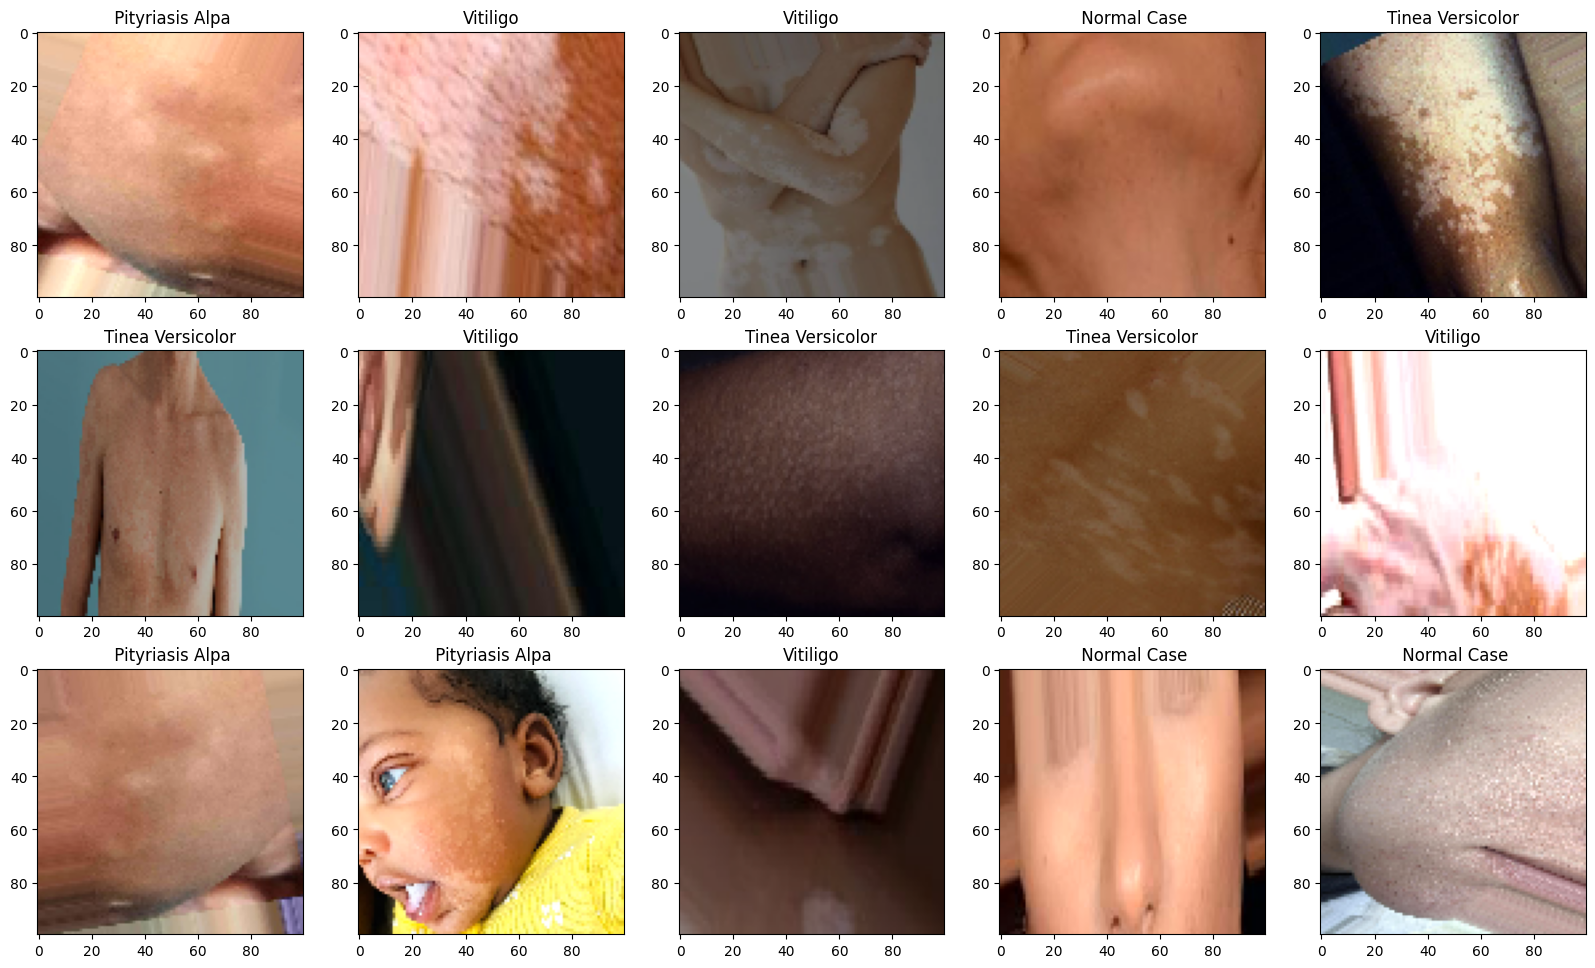

In [6]:
classes=list(TrainG.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in TrainG:
    for i in range(0,15):
        plt.subplot(5,5,i+1)
        plt.imshow(X_batch[i].astype(np.uint8))
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.show()
    break

#ResNet50

In [7]:
ResnetModel=keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=(100,100,3),classes=4)
ResnetModel.trainable=False
pt=Input(shape=(100,100,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func)
model_resnet=ResnetModel(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dropout(0.35)(model_resnet)
model_resnet=Dense(256,activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(model_resnet)
model_resnet=Dense(512,activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(model_resnet)
model_resnet=Dense(512,activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(model_resnet)
model_resnet=Dense(128,activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(model_resnet)
model_resnet=Dropout(0.15)(model_resnet)
model_resnet=Dense(4,activation='softmax')(model_resnet)
Model_1=Model(inputs=pt,outputs=model_resnet)
Model_1.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 100, 100, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 100, 100, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 100, 100, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0      

In [8]:
Model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
train_model = Model_1.fit(TrainG,validation_data=ValidG,epochs=44,batch_size=64)

Epoch 1/44
81/81 [==============================] - 1664s 21s/step - loss: 15.4399 - accuracy: 0.5451 - val_loss: 14.3372 - val_accuracy: 0.7156
Epoch 2/44
81/81 [==============================] - 171s 2s/step - loss: 13.6320 - accuracy: 0.7061 - val_loss: 12.7647 - val_accuracy: 0.7859
Epoch 3/44
81/81 [==============================] - 171s 2s/step - loss: 12.1658 - accuracy: 0.7691 - val_loss: 11.4548 - val_accuracy: 0.8062
Epoch 4/44
81/81 [==============================] - 171s 2s/step - loss: 10.9205 - accuracy: 0.7955 - val_loss: 10.3016 - val_accuracy: 0.8344
Epoch 5/44
81/81 [==============================] - 170s 2s/step - loss: 9.8279 - accuracy: 0.8250 - val_loss: 9.2750 - val_accuracy: 0.8672
Epoch 6/44
81/81 [==============================] - 171s 2s/step - loss: 8.8816 - accuracy: 0.8375 - val_loss: 8.4586 - val_accuracy: 0.8531
Epoch 7/44
81/81 [==============================] - 170s 2s/step - loss: 8.0669 - accuracy: 0.8499 - val_loss: 7.6708 - val_accuracy: 0.8656
Epo

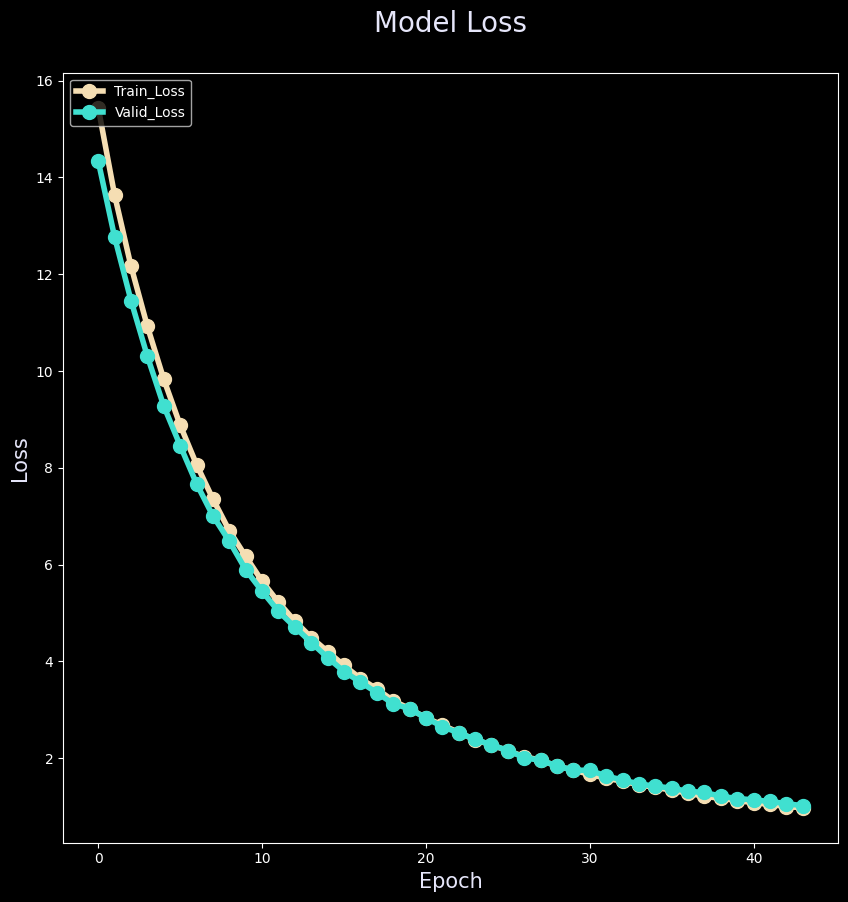

In [12]:
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(train_model.history['loss'],marker="o",linestyle="-",color="wheat",markersize=10,lw=4)
plt.plot(train_model.history['val_loss'],marker="o",linestyle="-",color="turquoise",markersize=10,lw=4)
plt.title('Model Loss\n',color="lavender",fontsize=20)
plt.ylabel('Loss',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Loss', 'Valid_Loss'], loc='upper left')
plt.show()

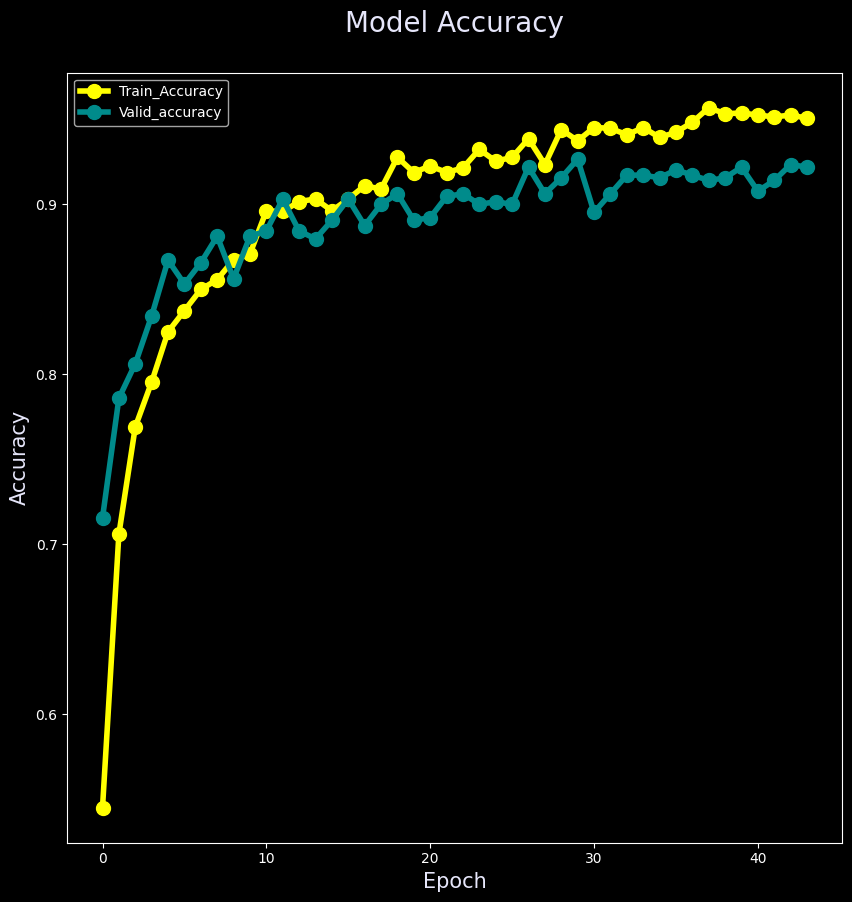

In [10]:
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(train_model.history['accuracy'],marker="o",linestyle="-",color="yellow",markersize=10,lw=4)
plt.plot(train_model.history['val_accuracy'],marker="o",linestyle="-",color="darkcyan",markersize=10,lw=4)
plt.title('Model Accuracy\n',color="lavender",fontsize=20)
plt.ylabel('Accuracy',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Accuracy', 'Valid_accuracy'], loc='upper left')
plt.show()

Test Accuracy: 93.333 %


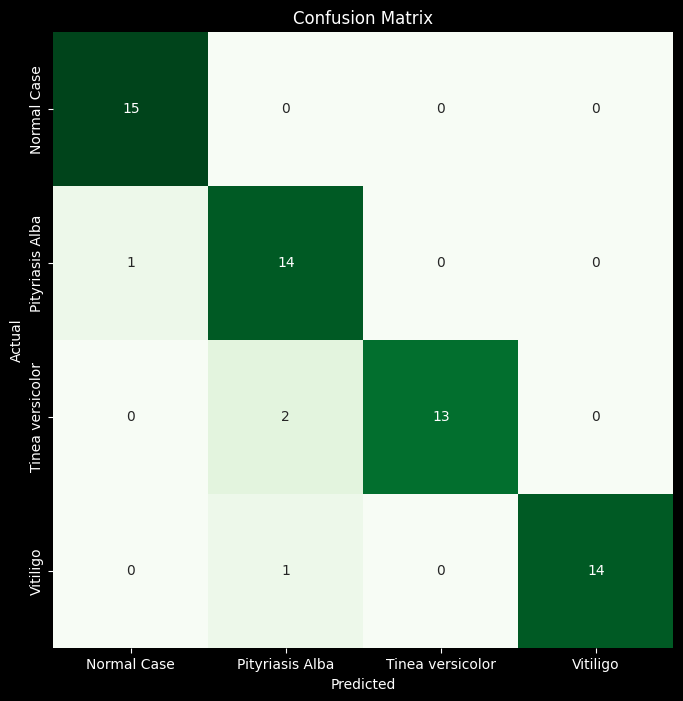

Classification Report:
-----------------------------
                   precision    recall  f1-score   support

     Normal Case       0.94      1.00      0.97        15
 Pityriasis Alba       0.82      0.93      0.87        15
Tinea versicolor       1.00      0.87      0.93        15
        Vitiligo       1.00      0.93      0.97        15

        accuracy                           0.93        60
       macro avg       0.94      0.93      0.93        60
    weighted avg       0.94      0.93      0.93        60



In [18]:
CLASS_NAMES = list(TrainG.class_indices.keys())
predictions = np.argmax(Model_1.predict(testD), axis=1)

acc = accuracy_score(testD.labels, predictions)
cm = tf.math.confusion_matrix(testD.labels, predictions)
clr = classification_report(testD.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=np.arange(4)+0.5 , labels=CLASS_NAMES)
plt.yticks(ticks=np.arange(4)+0.5 , labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------------\n", clr)

#VGG19

In [ ]:
VGG19_Model=keras.applications.VGG19(include_top=False,weights='imagenet',input_shape=(100,100,3),classes=4)
VGG19_Model.trainable=False
pt=Input(shape=(100,100,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func)
VGG19Model=VGG19_Model(x,training=False)
VGG19Model=GlobalAveragePooling2D()(VGG19Model)
VGG19Model=Dense(800,activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(VGG19Model)
VGG19Model=Dense(250,activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(VGG19Model)
VGG19Model=Dense(200,activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(VGG19Model)
VGG19Model=Dense(120,activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(VGG19Model)
VGG19Model=Dense(4,activation='softmax')(VGG19Model)
Model_6=Model(inputs=pt,outputs=VGG19Model)
Model_6.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 tf.cast_2 (TFOpLambda)      (None, 100, 100, 3)       0         
                                                                 
 tf.__operators__.getitem_2   (None, 100, 100, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_2 (TFOpLambd  (None, 100, 100, 3)      0         
 a)                                                              
                                                                 
 vgg19 (Functional)          (None, 3, 3, 512)         20024384  
                                                            

In [ ]:
Model_6.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
train_model = Model_6.fit(TrainG,validation_data=ValidG,epochs=15)

Epoch 1/15
81/81 [==============================] - 542s 7s/step - loss: 10.8866 - accuracy: 0.6089 - val_loss: 6.8239 - val_accuracy: 0.6797
Epoch 2/15
81/81 [==============================] - 545s 7s/step - loss: 4.6712 - accuracy: 0.7679 - val_loss: 3.1184 - val_accuracy: 0.7891
Epoch 3/15
81/81 [==============================] - 543s 7s/step - loss: 2.3010 - accuracy: 0.8161 - val_loss: 1.7831 - val_accuracy: 0.8172
Epoch 4/15
81/81 [==============================] - 551s 7s/step - loss: 1.4023 - accuracy: 0.8332 - val_loss: 1.1895 - val_accuracy: 0.8375
Epoch 5/15
81/81 [==============================] - 544s 7s/step - loss: 1.0009 - accuracy: 0.8647 - val_loss: 0.9777 - val_accuracy: 0.8625
Epoch 6/15
81/81 [==============================] - 543s 7s/step - loss: 0.7951 - accuracy: 0.8814 - val_loss: 0.8753 - val_accuracy: 0.8266
Epoch 7/15
81/81 [==============================] - 540s 7s/step - loss: 0.6508 - accuracy: 0.9016 - val_loss: 0.7332 - val_accuracy: 0.8609
Epoch 8/15
8

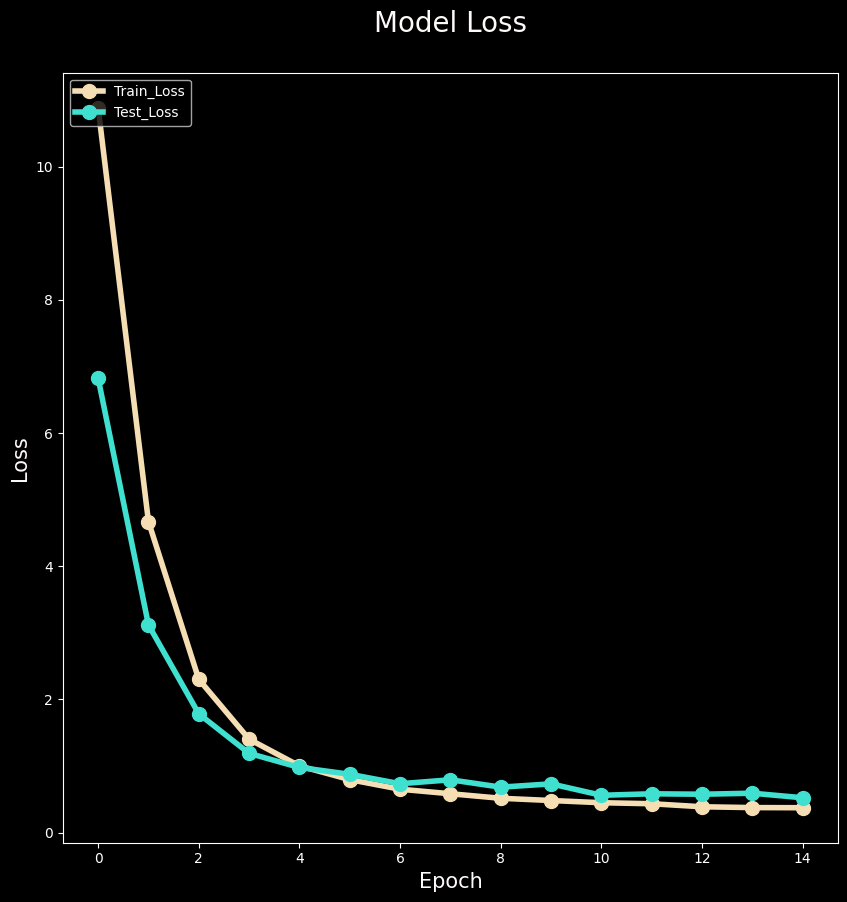

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(train_model.history['loss'],marker="o",linestyle="-",color="wheat",markersize=10,lw=4)
plt.plot(train_model.history['val_loss'],marker="o",linestyle="-",color="turquoise",markersize=10,lw=4)
plt.title('Model Loss\n',color="snow",fontsize=20)
plt.ylabel('Loss',color="snow",fontsize=15)
plt.xlabel('Epoch',color="snow",fontsize=15)
plt.legend(['Train_Loss', 'Test_Loss'], loc='upper left')
plt.show()

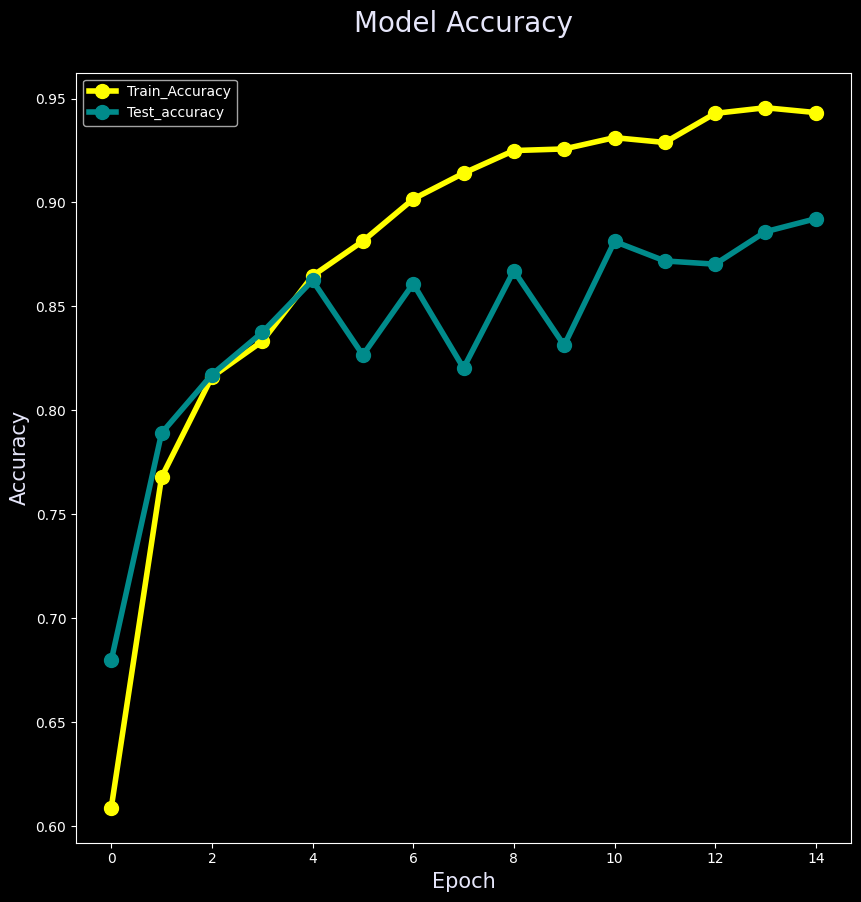

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(train_model.history['accuracy'],marker="o",linestyle="-",color="yellow",markersize=10,lw=4)
plt.plot(train_model.history['val_accuracy'],marker="o",linestyle="-",color="darkcyan",markersize=10,lw=4)
plt.title('Model Accuracy\n',color="lavender",fontsize=20)
plt.ylabel('Accuracy',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Accuracy', 'Test_accuracy'], loc='upper left')
plt.show()

2/2 [==============================] - 12s 4s/step
Test Accuracy: 83.333 %


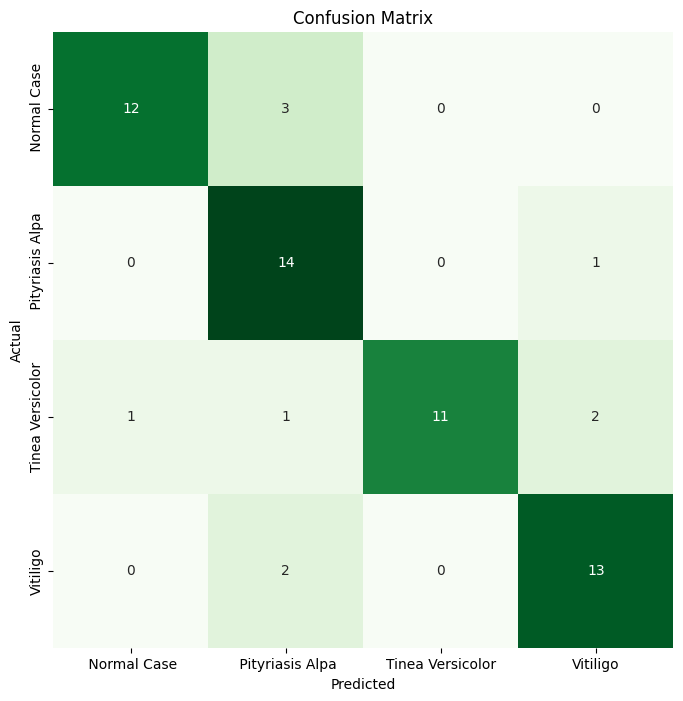

Classification Report:
-----------------------------
                   precision    recall  f1-score   support

     Normal Case       0.92      0.80      0.86        15
 Pityriasis Alpa       0.70      0.93      0.80        15
Tinea Versicolor       1.00      0.73      0.85        15
        Vitiligo       0.81      0.87      0.84        15

        accuracy                           0.83        60
       macro avg       0.86      0.83      0.84        60
    weighted avg       0.86      0.83      0.84        60



In [ ]:
Model_6 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Graduation Project/VGG19.h5')

CLASS_NAMES = list(TrainG.class_indices.keys())
predictions = np.argmax(Model_6.predict(testD), axis=1)

acc = accuracy_score(testD.labels, predictions)
cm = tf.math.confusion_matrix(testD.labels, predictions)
clr = classification_report(testD.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=np.arange(4)+0.5 , labels=CLASS_NAMES)
plt.yticks(ticks=np.arange(4)+0.5 , labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------------\n", clr)

#MobileNet

In [ ]:
MobileNet_Model=keras.applications.MobileNet(include_top=False,weights='imagenet',input_shape=(100,100,3),classes=4)
MobileNet_Model.trainable=False
pt=Input(shape=(100,100,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func)
MobileNetModel=MobileNet_Model(x,training=False)
MobileNetModel=GlobalAveragePooling2D()(MobileNetModel)
MobileNetModel=Dropout(0.3)(MobileNetModel)
MobileNetModel=Dense(650,activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(MobileNetModel)
MobileNetModel=Dense(256,activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(MobileNetModel)
MobileNetModel=Dense(210,activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(MobileNetModel)
MobileNetModel=Dense(128,activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.01))(MobileNetModel)
MobileNetModel=Dense(4,activation='softmax')(MobileNetModel)
Model_5=Model(inputs=pt,outputs=MobileNetModel)
Model_5.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 tf.cast_10 (TFOpLambda)     (None, 100, 100, 3)       0         
                                                                 
 tf.__operators__.getitem_10  (None, 100, 100, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_10 (TFOpLamb  (None, 100, 100, 3)      0         
 da)                                                             
                                                                 
 mobilenet_1.00_224 (Functio  (None, 3, 3, 1024)       3228864   
 nal)                                                            
                                                           

In [ ]:
Model_5.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
train_model = Model_5.fit(TrainG,validation_data=ValidG,epochs=80,batch_size=64)

Epoch 1/80
81/81 [==============================] - 68s 798ms/step - loss: 15.8174 - accuracy: 0.4047 - val_loss: 14.8215 - val_accuracy: 0.4797
Epoch 2/80
81/81 [==============================] - 64s 787ms/step - loss: 14.0283 - accuracy: 0.5156 - val_loss: 13.2103 - val_accuracy: 0.5328
Epoch 3/80
81/81 [==============================] - 53s 659ms/step - loss: 12.5310 - accuracy: 0.5502 - val_loss: 11.8761 - val_accuracy: 0.5547
Epoch 4/80
81/81 [==============================] - 53s 650ms/step - loss: 11.2050 - accuracy: 0.5813 - val_loss: 10.5843 - val_accuracy: 0.5859
Epoch 5/80
81/81 [==============================] - 53s 652ms/step - loss: 10.0816 - accuracy: 0.5999 - val_loss: 9.5084 - val_accuracy: 0.6500
Epoch 6/80
81/81 [==============================] - 54s 660ms/step - loss: 9.1102 - accuracy: 0.6178 - val_loss: 8.7261 - val_accuracy: 0.6156
Epoch 7/80
81/81 [==============================] - 53s 657ms/step - loss: 8.2945 - accuracy: 0.6314 - val_loss: 7.8991 - val_accurac

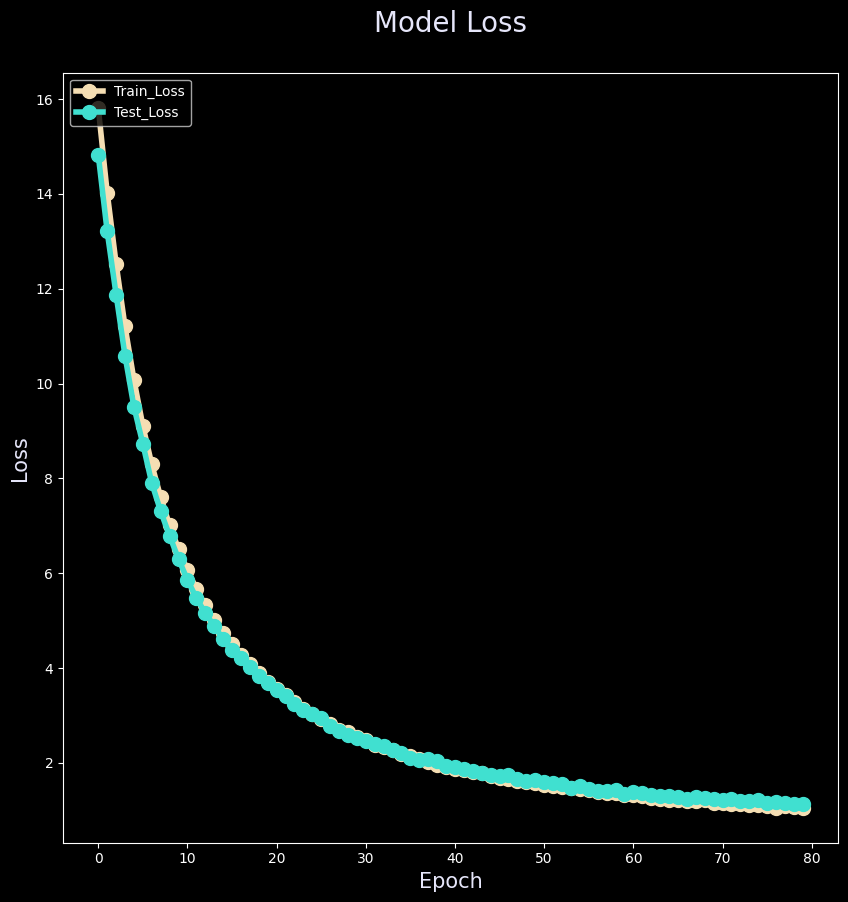

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(train_model.history['loss'],marker="o",linestyle="-",color="wheat",markersize=10,lw=4)
plt.plot(train_model.history['val_loss'],marker="o",linestyle="-",color="turquoise",markersize=10,lw=4)
plt.title('Model Loss\n',color="lavender",fontsize=20)
plt.ylabel('Loss',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Loss', 'Test_Loss'], loc='upper left')
plt.show()

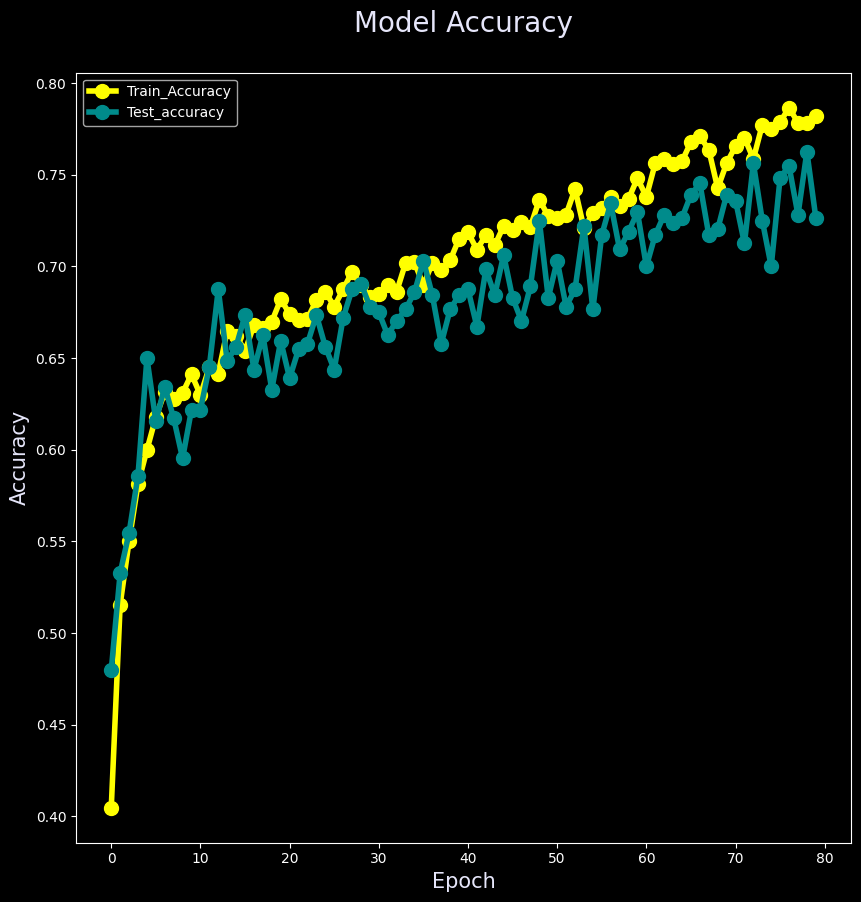

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use("dark_background")
plt.plot(train_model.history['accuracy'],marker="o",linestyle="-",color="yellow",markersize=10,lw=4)
plt.plot(train_model.history['val_accuracy'],marker="o",linestyle="-",color="darkcyan",markersize=10,lw=4)
plt.title('Model Accuracy\n',color="lavender",fontsize=20)
plt.ylabel('Accuracy',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Accuracy', 'Test_accuracy'], loc='upper left')
plt.show()

2/2 [==============================] - 2s 224ms/step
Test Accuracy: 63.333 %


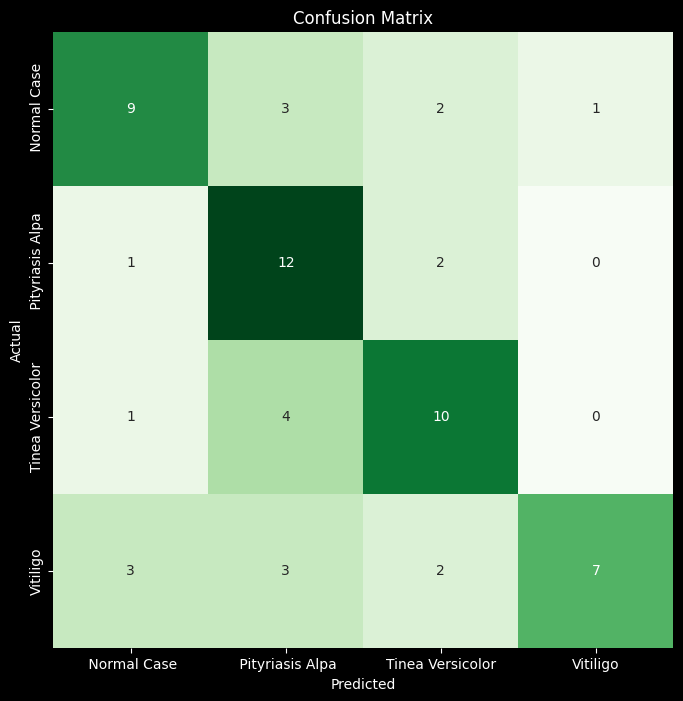

Classification Report:
-----------------------------
                   precision    recall  f1-score   support

     Normal Case       0.64      0.60      0.62        15
 Pityriasis Alpa       0.55      0.80      0.65        15
Tinea Versicolor       0.62      0.67      0.65        15
        Vitiligo       0.88      0.47      0.61        15

        accuracy                           0.63        60
       macro avg       0.67      0.63      0.63        60
    weighted avg       0.67      0.63      0.63        60



In [ ]:
CLASS_NAMES = list(TrainG.class_indices.keys())
predictions = np.argmax(Model_5.predict(testD), axis=1)

acc = accuracy_score(testD.labels, predictions)
cm = tf.math.confusion_matrix(testD.labels, predictions)
clr = classification_report(testD.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=np.arange(4)+0.5 , labels=CLASS_NAMES)
plt.yticks(ticks=np.arange(4)+0.5 , labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------------\n", clr)

#Convertion highest accuracy model to tflite

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow import keras
import tensorflow as tf
import numpy as np

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Graduation Project/RESNET50.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
open('/content/drive/MyDrive/Colab Notebooks/Graduation Project/LastResnet50.tflite', "wb").write(tflite_quant_model)

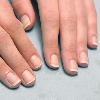

[[0.9142274  0.01969322 0.0436351  0.02244428]]
Normal Skin


In [ ]:
labels = {0:'Normal Skin',1:'Pityriasis Alba', 2:'Tinea versicolor', 3:'Vitiligo'}
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Colab Notebooks/Graduation Project/testing/Normal Case/6 (1).png', target_size=(100,100))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img.show()

with open('/content/drive/MyDrive/Colab Notebooks/Best1Resnet50.tflite', 'rb') as fid:
    tflite_model = fid.read()

tflite_interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

tflite_interpreter.resize_tensor_input(input_details[0]['index'], (1, 100, 100, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (1, 4))
tflite_interpreter.allocate_tensors()

tflite_interpreter.set_tensor(input_details[0]['index'], img_array)
# Run inference
tflite_interpreter.invoke()
# Get prediction results
tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])

predicted_ids = np.argmax(tflite_model_predictions, axis=-1)
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Graduation Project/HighestModel4ClassVGG19.h5')

print(tflite_model_predictions)
print(labels[int(predicted_ids)])

## Roc Curve For Our Best Model

2/2 [==============================] - 4s 1s/step


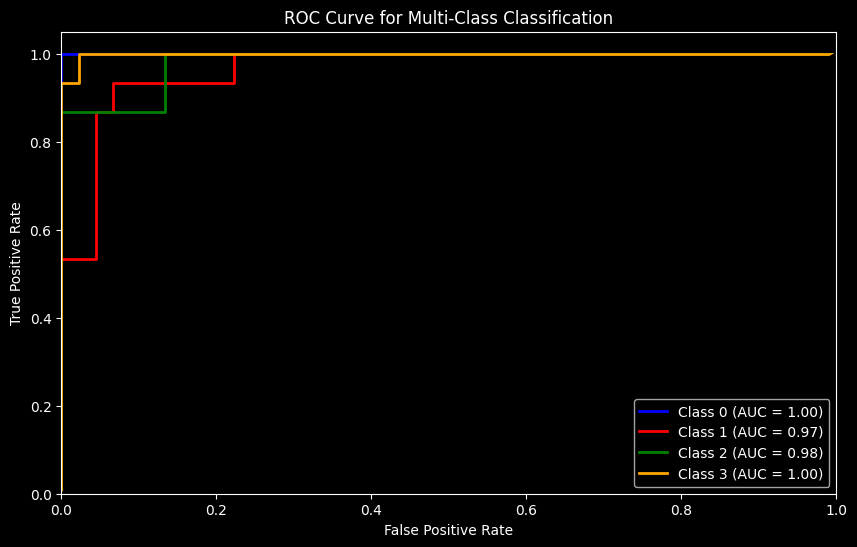

In [23]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the model
Model_1 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Graduation Project/RESNET50.h5')

# Get the predictions and actual labels
predictions = Model_1.predict(testD)
labels = testD.classes

# Calculate the number of classes
num_classes = len(testD.class_indices)

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(labels, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange']  # Adjust the colors as per the number of classes

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()
